In [1]:
%cd ../..
%run cryptolytic/notebooks/init.ipynb

/home/me/Documents/Git/Lambda-School-Labs/cryptolytic-ds
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import cryptolytic.util.core as util
import cryptolytic.start as start
import cryptolytic.viz.plot as plot
import cryptolytic.data.sql as sql
import cryptolytic.data.historical as h
import cryptolytic.model as m
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from matplotlib.pylab import rcParams
from IPython.core.display import HTML
from pandas.plotting import register_matplotlib_converters # to stop a warning message


ohclv = ['open', 'high', 'close', 'low', 'volume']
plt.style.use('ggplot')
rcParams['figure.figsize'] = 20,7
start.init()
register_matplotlib_converters()


# Make math readable
HTML("""
<style>
.MathJax {
    font-size: 2rem;
}
</style>""")

In [47]:
def get_df(info):
    """
    Pull info from database and augment it for analysis
    """
    df = sql.get_some_candles(info=info, n=4000, verbose=True)
    df['diff'] = df['high'] - df['low']
    dfarb = sql.get_arb_info(info)
    
    merge_cols = ['trading_pair', 'exchange', 'timestamp', 'period', 'datetime']
    df = df.merge(dfarb, how='inner', on=merge_cols)
    return df 

df = get_df( {'start':1556668800, 'period':60, 'trading_pair':'eth_btc', 'exchange_id':'bitfinex'})
df_300 = get_df( {'start':1556668800, 'period':300, 'trading_pair':'eth_btc', 'exchange_id':'bitfinex'})
df2 = get_df({'start':1556668800, 'period':300, 'trading_pair':'eth_btc', 'exchange_id':'hitbtc'})

In [33]:
df.head()

,api,exchange,trading_pair,timestamp,period,open,close,high,low,volume,diff,avg,arb_diff,arb_signal
datetime,,,,,,,,,,,,,,
2019-05-01 00:00:00,bitfinex,bitfinex,eth_btc,1556668800,60,0.030423,0.030429,0.030429,0.030423,11.346098,0.000006,0.03040949999999999850,0.000020,0.064125
2019-05-01 00:01:00,bitfinex,bitfinex,eth_btc,1556668860,60,0.030434,0.030435,0.030435,0.030434,2.516300,0.000001,0.03041799999999999850,0.000017,0.055888
2019-05-01 00:07:00,bitfinex,bitfinex,eth_btc,1556669220,60,0.030435,0.030435,0.030435,0.030435,0.295620,0.000000,0.03041799999999999850,0.000017,0.055888
2019-05-01 00:09:00,bitfinex,bitfinex,eth_btc,1556669340,60,0.030435,0.030444,0.030444,0.030435,10.641862,0.000009,0.03043000000000000100,0.000014,0.046007
2019-05-01 00:10:00,bitfinex,bitfinex,eth_btc,1556669400,60,0.030453,0.030455,0.030458,0.030453,11.908304,0.000005,0.03043650000000000000,0.000018,0.060782


In [34]:
len(df2)

1000

In [35]:
def plot_arbitration(df):
    fig, ax1 = plt.subplots()
    plt.title('Arbitration Graph')
    
    color = 'tab:red'
    ax1.set_ylabel('Data', color=color)
    ax1.plot(df.index, df.close, color=color, label=f'{df.exchange[0]}')
    ax1.tick_params(axis='y', labelcolor=color)
    color ='tab:green'
    ax1.plot(df.index, df.avg, color=color, label='Mean Closing Price')
    ax1.legend(loc='lower left')
    
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Signal', color=color)  
    ax2.plot(df.index,m.denoise(df.arb_signal, 20), color=color, label='Signal')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='lower right')

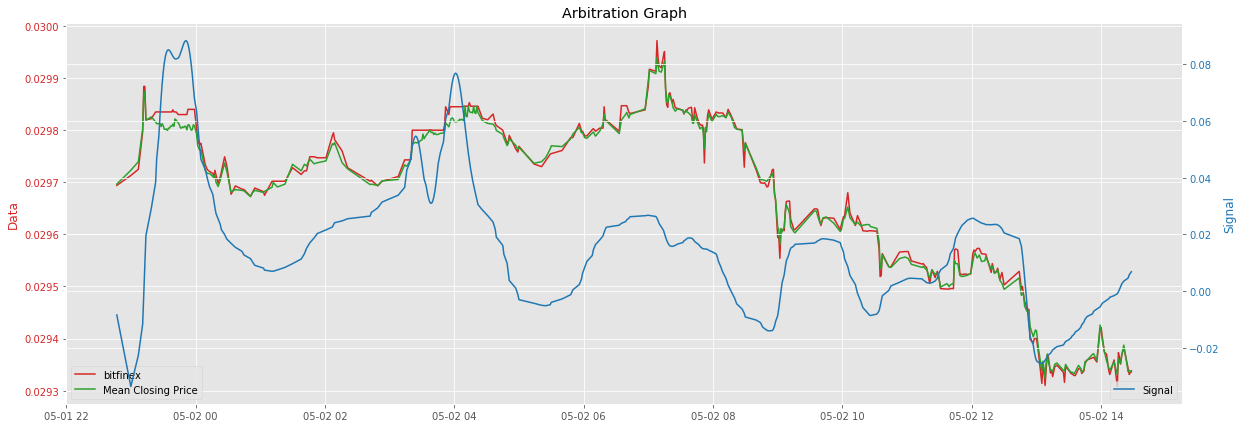

In [54]:
plot_arbitration(df.iloc[600:1000])

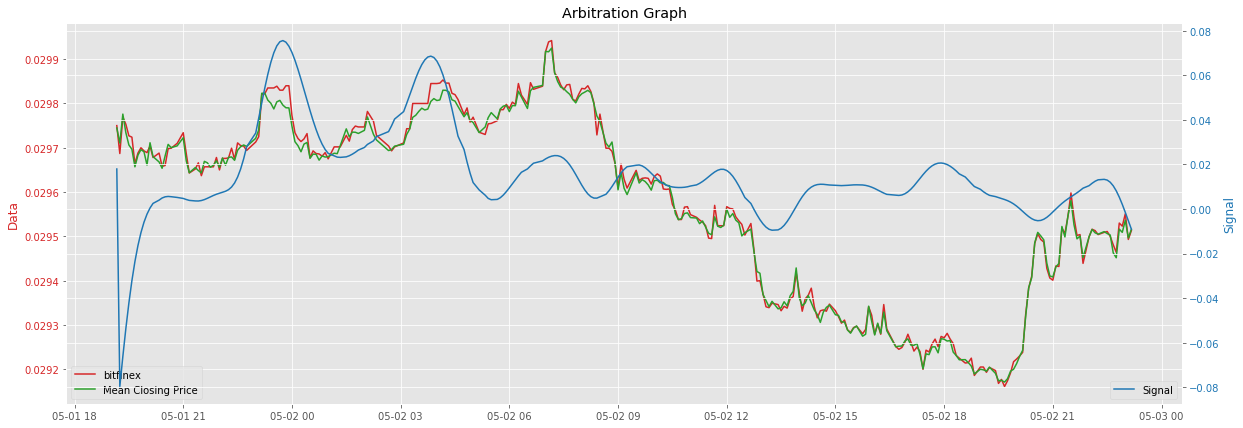

In [53]:
plot_arbitration(df_300[600//3:500])
#plot_arbitration(df2)

In [27]:
df['2019-05-01 01:55:00':]

,api,exchange,trading_pair,timestamp,period,open,close,high,low,volume,diff,avg,arb_diff,arb_signal
datetime,,,,,,,,,,,,,,
2019-05-01 01:55:00,bitfinex,bitfinex,eth_btc,1556675700,300,0.030373,0.030331,0.030373,0.030331,8.802305,4.200000e-05,0.03031400000000000067,1.700000e-05,0.056080
2019-05-01 02:05:00,bitfinex,bitfinex,eth_btc,1556676300,300,0.030301,0.030301,0.030301,0.030301,0.860226,0.000000e+00,0.03031333333333333333,-1.233333e-05,-0.040686
2019-05-01 02:10:00,bitfinex,bitfinex,eth_btc,1556676600,300,0.030301,0.030301,0.030301,0.030301,6.539774,0.000000e+00,0.03030733333333333333,-6.333333e-06,-0.020897
2019-05-01 02:15:00,bitfinex,bitfinex,eth_btc,1556676900,300,0.030302,0.030302,0.030302,0.030301,1.891710,1.000000e-06,0.03028833333333333333,1.366667e-05,0.045122
2019-05-01 02:20:00,bitfinex,bitfinex,eth_btc,1556677200,300,0.030300,0.030300,0.030300,0.030300,0.620000,0.000000e+00,0.03027533333333333333,2.466667e-05,0.081474
2019-05-01 02:25:00,bitfinex,bitfinex,eth_btc,1556677500,300,0.030263,0.030263,0.030263,0.030263,0.050000,0.000000e+00,0.03026066666666666767,2.333333e-06,0.007711
2019-05-01 02:30:00,bitfinex,bitfinex,eth_btc,1556677800,300,0.030263,0.030263,0.030263,0.030263,6.700330,0.000000e+00,0.03025966666666666667,3.333333e-06,0.011016
2019-05-01 02:35:00,bitfinex,bitfinex,eth_btc,1556678100,300,0.030264,0.030263,0.030264,0.030263,0.504086,1.000000e-06,0.03026366666666666600,-6.666667e-07,-0.002203
2019-05-01 02:55:00,bitfinex,bitfinex,eth_btc,1556679300,300,0.030264,0.030305,0.030305,0.030264,68.015667,4.100000e-05,0.03029233333333333333,1.266667e-05,0.041815


In [28]:
df_sub =  (df['arb_signal'] - df2['arb_signal']).dropna()
plt.title('Arbitrage Between 
plt.plot(df_sub.index, m.denoise(df_sub, 10))

SyntaxError: EOL while scanning string literal (<ipython-input-28-bab79b47f660>, line 2)